In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import pylab as pl
from numpy import fft
import ipywidgets as widgets

import numpy as np
from numpy import cos as cos 
from numpy import sin as sin

# We'll need these new ones below
from scipy import signal
from scipy.io.wavfile import read,write

import sounddevice as sd
from IPython.display import Audio

# In the quiz we learned to capture and play back audio, lets create the reversed audio output


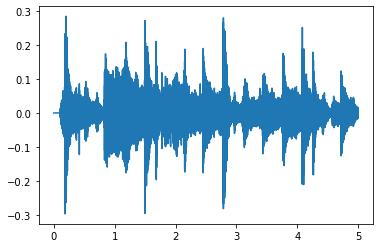

In [2]:
#need to add sample rate
sample_rate=44100 #Hz

# Record from your microphone for 3 seconds: sd.rec
sound_arr = sd.rec(5*sample_rate, channels=1, samplerate=sample_rate, blocking=True)[:,0]

# Play the sound, same as above
sd.play(sound_arr, sample_rate, blocking=True)

# Plot the data you recorded
time=np.linspace(0, 5, len(sound_arr))
plt.plot(time, sound_arr)

In [3]:
#normal playback
write('Normal.wav', sample_rate, sound_arr)
fs,inputnormal = read('Normal.wav')
Audio(inputnormal,rate=sample_rate)

In [4]:
#audio flip
reversed = np.flip(sound_arr)
write('Flipped.wav', sample_rate, reversed)
fs,inputreversed = read('Flipped.wav')
#playback function
Audio(inputreversed,rate=sample_rate)

# Now that we've figured out how to reverse audio using np.flip, we'll focus on changing the speed


In [5]:
#sped up playback
#To speed up we change the sapmle rate speed. We can change the last interger to manipulate the speed
#Here any integeter greater than one will do
speed=1.5
write('Fast.wav', sample_rate, sound_arr)
fs,inputnormal = read('Fast.wav')
Audio(inputnormal,rate=sample_rate*speed)

In [6]:
#slowed
#sped up playback
#To speed up we change the sapmle rate speed.
slow=0.5
write('Slow.wav', sample_rate, sound_arr)
fs,inputnormal = read('Slow.wav')
Audio(inputnormal,rate=sample_rate*slow)

# Now we'll create our low and high pass filters

(-800.0, 800.0)

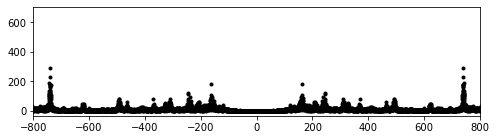

In [8]:
#low pass here we'll test and make sure we get a viable plot
# Save the recorded audio waveform_rec to file "example.wav" with sampling frequency fs
write("example.wav", fs , sound_arr)

# Load the saved file. Notice that the output of read (filename) is the sampling frequency & the signal
fs, ex_input = read('example.wav')

fft = np.fft.fft(ex_input)


freq_bins = np.fft.fftfreq(len(sound_arr), d=1/sample_rate)

# Plot the FFT. Notice the higher harmonics? Those are natural overtones. Hard to see in the time-domain signal!
plt.figure(figsize=(8,2))
fig_fft = plt.plot(freq_bins,(np.abs(fft)),'k.') # Plot the absolute value
plt.xlim(-800,800)

(-800.0, 800.0)

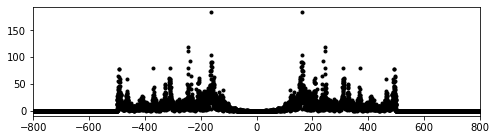

In [9]:
# on to creating the audio
fft_filt = np.fft.fft(ex_input)

# Get the indices of frequencies larger than +/- 200 Hz
# filt_ind=np.where(np.abs(freq_bins)>500.00)
filt_ind=np.where(np.abs(freq_bins)>500.00)

# Then set the fft to zero for the indices you found above. This is an "ugly" filter since the cut-off is sharp
# but it's the clearest to see what is happening in frequency space
fft_filt[filt_ind] = 0

# Plot the filtered fft to make sure we did it right
plt.figure(figsize=(8,2))
fig_fft = plt.plot(freq_bins,(np.abs(fft_filt)),'k.') # Plot the absolute value
plt.xlim(-800,800)

#as we can see the audio is cut exactly at 500

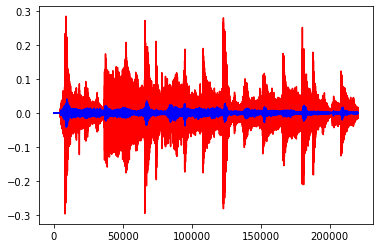

In [10]:
#Inverse so its playable again
ex_input_filt = np.real(np.fft.ifft(fft_filt))
plt.figure()
fig = plt.plot(ex_input,'r-',ex_input_filt,'b-') # Plot the absolute value

In [11]:
Audio(ex_input,rate=fs)

In [12]:
Audio(ex_input_filt,rate=fs)

# Here we succesfully created a low pass filter and in comparison to the original it is significantly muted, now on to high pass

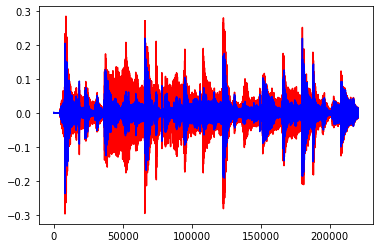

In [13]:
# HIGH pass filter
#saving input audio as a temporary wav file
write("example2.wav", fs , sound_arr)
fs, ex_input = read('example2.wav')
fft = np.fft.fft(ex_input)
cutoff=2000.00

freq_bins = np.fft.fftfreq(len(sound_arr), d=1/sample_rate)

#creating the audio file
fft_filt = np.fft.fft(ex_input)

# Get the indices of frequencies larger than +/- 200 Hz
# filt_ind=np.where(np.abs(freq_bins)<2000.00)
filt_ind=np.where(np.abs(freq_bins)<cutoff)

# Then set the fft to zero for the indices you found above. This is an "ugly" filter since the cut-off is sharp
# but it's the clearest to see what is happening in frequency space
fft_filt[filt_ind] = 0

# Plot the filtered fft to make sure we did it right
#Inverse so its playable again
ex_input_filt2 = np.real(np.fft.ifft(fft_filt))
plt.figure()
fig = plt.plot(ex_input,'r-',ex_input_filt2,'b-') # Plot the absolute value

In [14]:
Audio(ex_input,rate=fs)

In [15]:
Audio(ex_input_filt2,rate=fs)

# We succesfully created the high pass filter, the audio sounds clear but hollow and empty in a sense. Now I will create interactive component for speed and filtering like a real life studio engineer

In [2]:
#Here I am creating widgets to change the speed and the depth of the lowpass filter
#A majority of recognizable sound is below 5k this way we can soften the sound so to speak
#Also if we ever wanted to analyze sound and say measure the roatations of a fan we could do so visually
# with out inversed fft
s = widgets.FloatSlider(min=0.5,max=2.0,step=0.10,description='Speed',value=1.0)
tune = widgets.FloatSlider(min=500.00,max=5000.00,step=100.00,description='Filter Cutoff',value=5000.00)
h1 = widgets.HBox(children=[s,tune])
write("custom.wav", fs , sound_arr)
fs, ex_input = read('custom.wav')
def autotuner(s,tune):
    fft = np.fft.fft(ex_input)

    freq_bins = np.fft.fftfreq(len(sound_arr), d=1/sample_rate)

    #creating the audio file
    fft_filt = np.fft.fft(ex_input)

    # Get the indices of frequencies larger than +/- 200 Hz
    # filt_ind=np.where(np.abs(freq_bins)<variable)
    filt_ind=np.where(np.abs(freq_bins)>tune)

    # Then set the fft to zero for the indices you found above. This is an "ugly" filter since the cut-off is sharp
    # but it's the clearest to see what is happening in frequency space
    fft_filt[filt_ind] = 0

    # Plot the filtered fft to make sure we did it right
    #Inverse so its playable again
    customfilt = np.real(np.fft.ifft(fft_filt))
    plt.figure()
    fig = plt.plot(ex_input,'r-',customfilt,'b-') # Plot the absolute value
    display(Audio(customfilt,rate=fs*s))
    
out = widgets.interactive_output(autotuner,{"s":s,"tune":tune})
display(h1,out)

NameError: name 'fs' is not defined

In [17]:
#Original
Audio(ex_input,rate=fs)